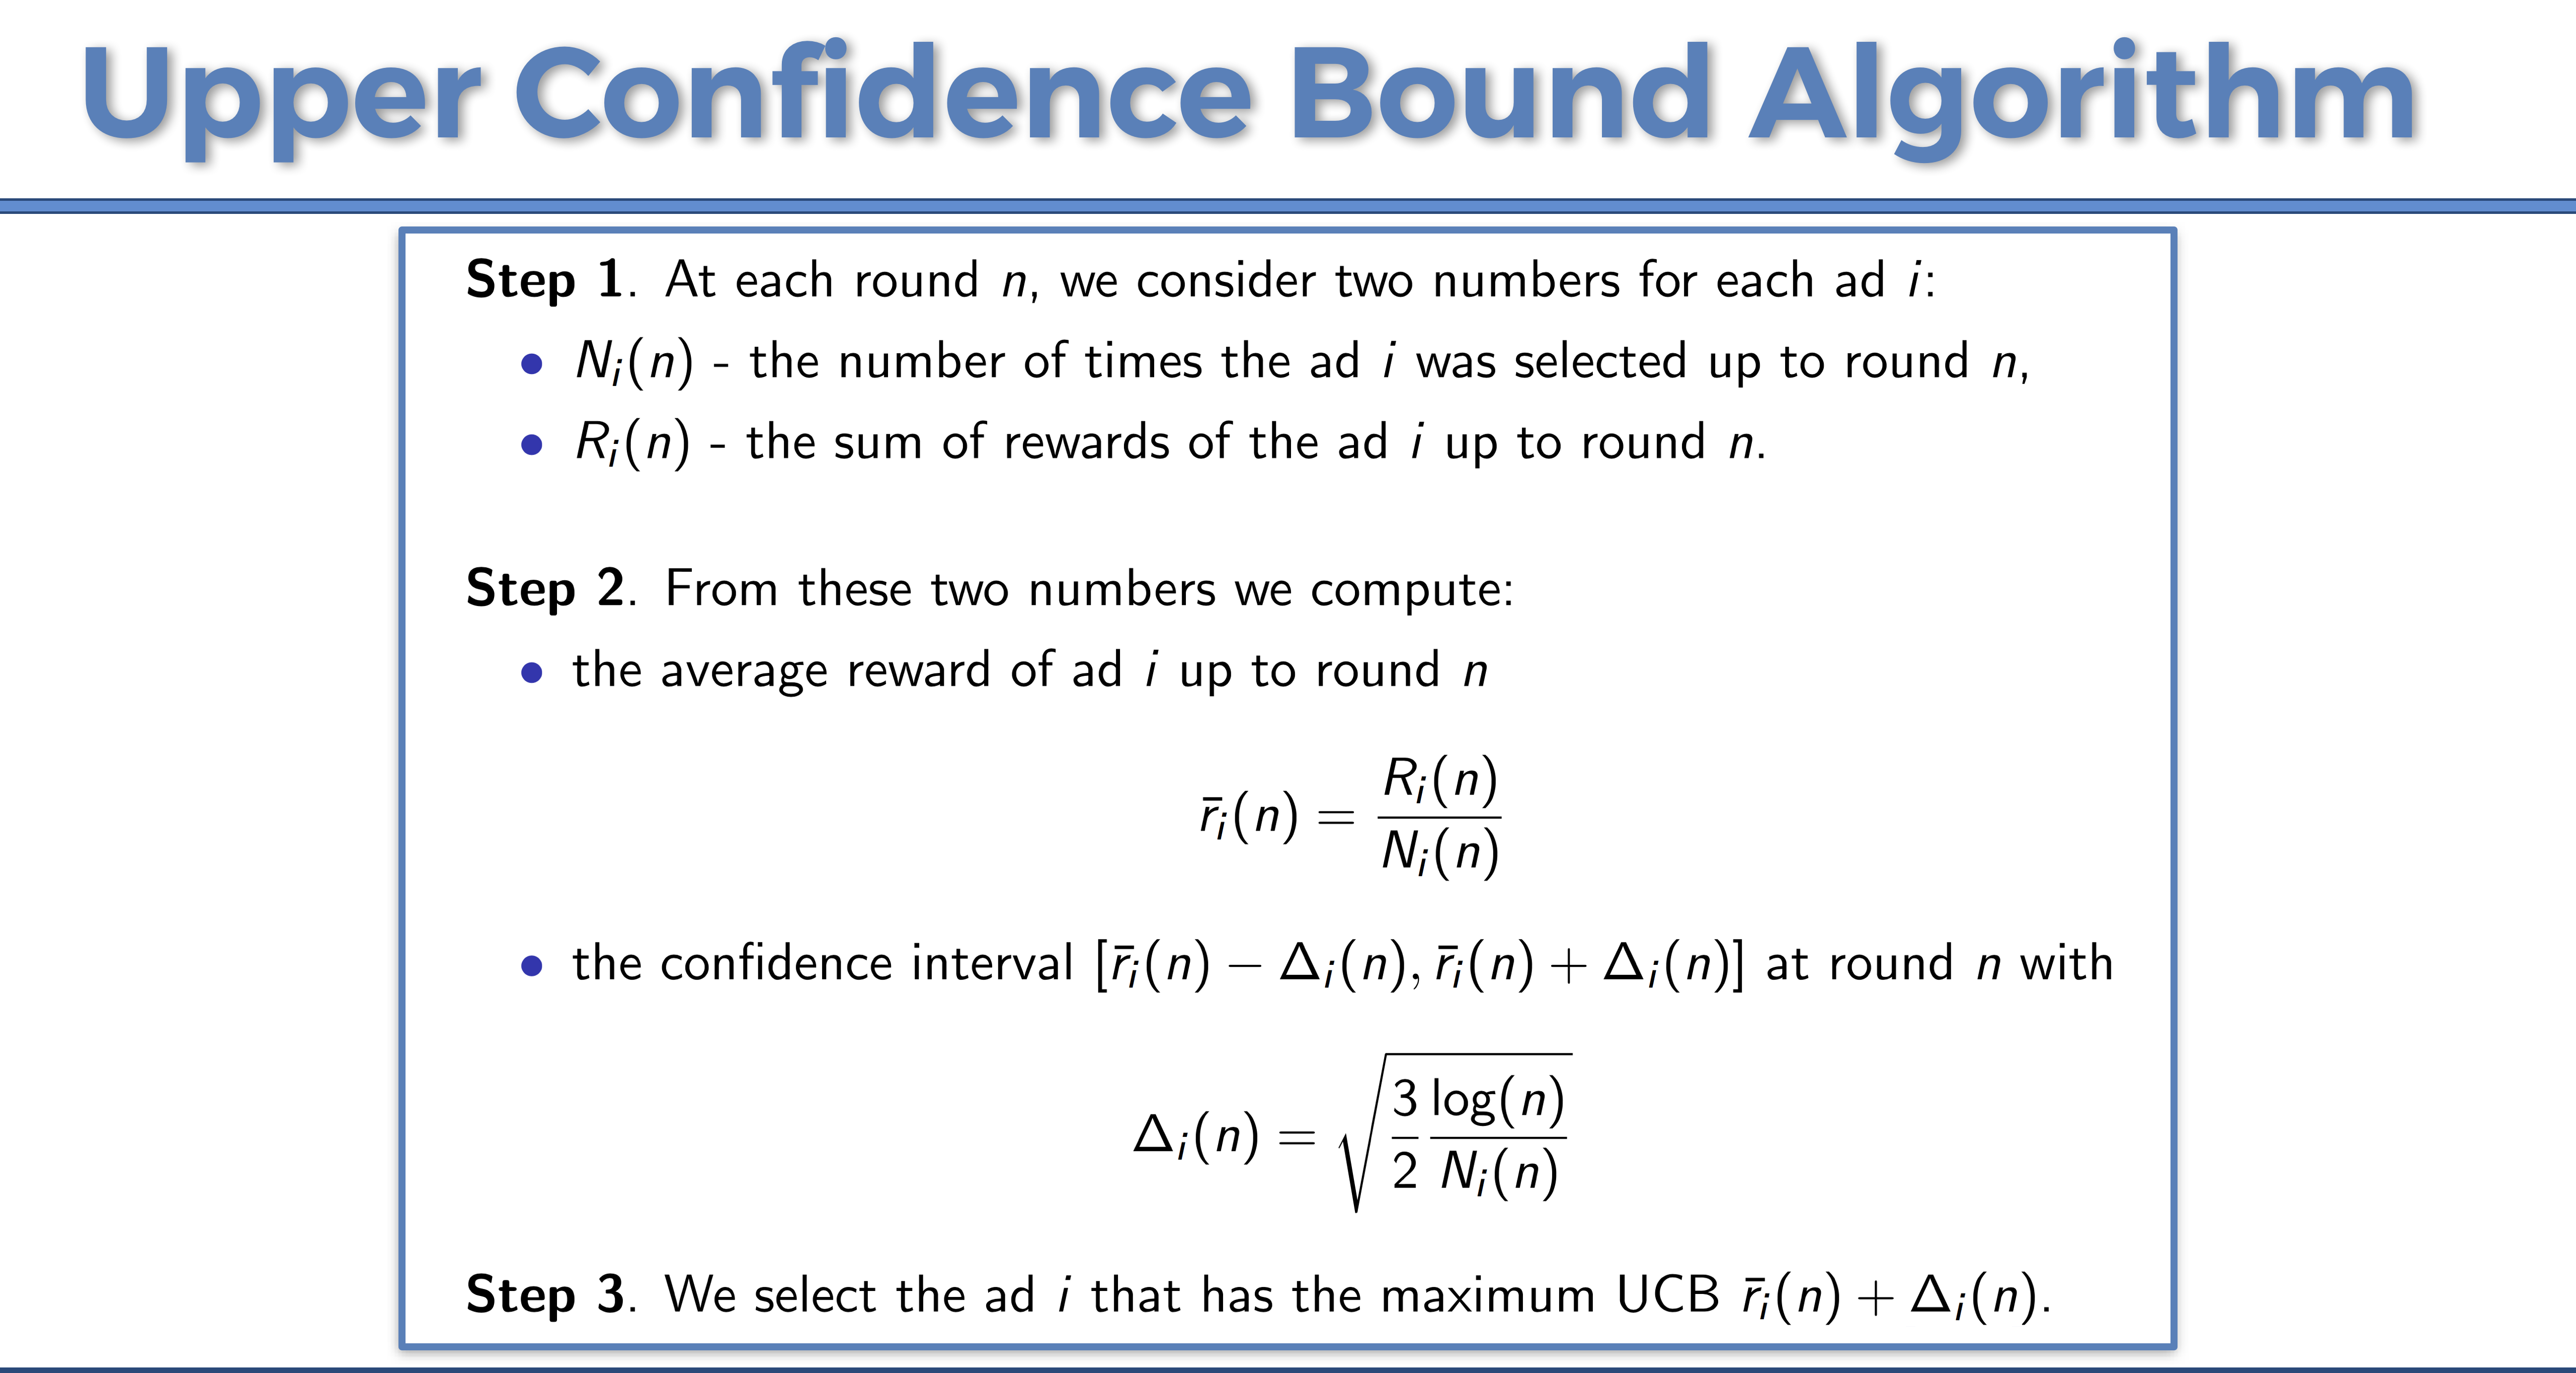

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Importing dataset - Ad Click Through Rate - Optimizing the click thru rate
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [5]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [6]:
# Implementing UCB
# If user clicks the add we get reward i.e. 1, else no reward i.e. 0

import math

# Number of users - len(df.axes[0]) or len(df)
N = len(dataset.axes[0])
print(f"Total number of users are: {N}")

# Number of ads we have - len(df.axes[1])
d = len(dataset.axes[1])
print(f"Total number of Ads are: {d}")

# List of selected Ads
ads_selected = []

# Ni(n) - Number of selections, number of times each ad was selected for all the ads
# initialize list of 10 elements initialized with 0's
number_of_selections = [0] * d

# Ri(n) - Sum of rewards, initialize list of 10 elements initialized with 0's
sum_of_rewards = [0] * d

# total rewards = Sum of all the rewards received at each round
total_reward = 0

# Iterating over all rounds

for n in range(0, N):
  ad = 0
  max_upper_bound = 0 
  for ads in range(0,d):
    if number_of_selections[ads] > 0:
      # Calculate average reward 
      average_reward = sum_of_rewards[ads] / number_of_selections[ads]
      # Calculate confidence_interval
      delta_i = math.sqrt(3/2 * math.log(n+1) / number_of_selections[ads])
      # Computer Upper Confidence Bound
      upper_bound = average_reward + delta_i
    else:
    # so that if that ad was not selected yet, we will select it
    # because indeed it will have the maximum of the upper confidence bound.
      upper_bound = 1e400
    # Compare with current max upper bound and update if larger than max upper bound
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = ads
  ads_selected.append(ad)
  number_of_selections[ad] += 1
  # the reward collected after showing the ad to this user, n
  reward = dataset.values[n, ad]
  sum_of_rewards[ad] = sum_of_rewards[ad] + reward
  # OR
  # sum_of_rewards[ad] += dataset.values[n, ad]
  total_reward = total_reward + reward

Total number of users are: 10000
Total number of Ads are: 10


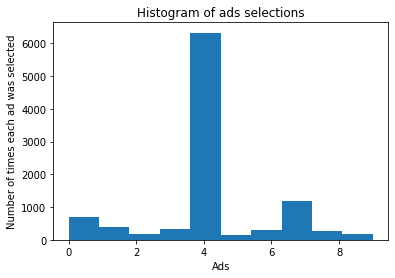

In [7]:
# Visualizing the results
# We would pick the machine with the highest Confidence Bound

plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()

Using 1000 samples...

Compare results with thompson sampling method to find which is better model

In [8]:
# using 1000 samples instead of 10000 and seeing how well the predictions are?

# Implementing UCB
# If user clicks the add we get reward i.e. 1, else no reward i.e. 0

import math

# Number of users - len(df.axes[0]) or len(df)
#N = len(dataset.axes[0])
N = 1000
print(f"Total number of users are: {N}")

# Number of ads we have - len(df.axes[1])
d = len(dataset.axes[1])
print(f"Total number of Ads are: {d}")

# List of selected Ads
ads_selected = []

# Ni(n) - Number of selections, number of times each ad was selected for all the ads
# initialize list of 10 elements initialized with 0's
number_of_selections = [0] * d

# Ri(n) - Sum of rewards, initialize list of 10 elements initialized with 0's
sum_of_rewards = [0] * d

# total rewards = Sum of all the rewards received at each round
total_reward = 0

# Iterating over all rounds

for n in range(0, N):
  ad = 0
  max_upper_bound = 0 
  for ads in range(0,d):
    if number_of_selections[ads] > 0:
      # Calculate average reward 
      average_reward = sum_of_rewards[ads] / number_of_selections[ads]
      # Calculate confidence_interval
      delta_i = math.sqrt(3/2 * math.log(n+1) / number_of_selections[ads])
      # Computer Upper Confidence Bound
      upper_bound = average_reward + delta_i
    else:
    # so that if that ad was not selected yet, we will select it
    # because indeed it will have the maximum of the upper confidence bound.
      upper_bound = 1e400
    # Compare with current max upper bound and update if larger than max upper bound
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = ads
  ads_selected.append(ad)
  number_of_selections[ad] += 1
  # the reward collected after showing the ad to this user, n
  reward = dataset.values[n, ad]
  sum_of_rewards[ad] = sum_of_rewards[ad] + reward
  # OR
  # sum_of_rewards[ad] += dataset.values[n, ad]
  total_reward = total_reward + reward

Total number of users are: 1000
Total number of Ads are: 10


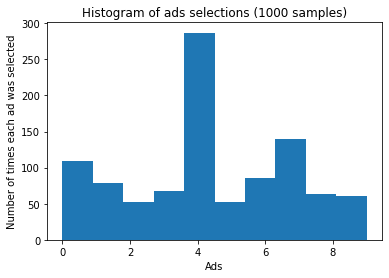

In [9]:
# Visualizing the results
# We would pick the machine with the highest Confidence Bound

plt.hist(ads_selected)
plt.title("Histogram of ads selections (1000 samples)")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()

Using 500 samples...

Compare results with thompson sampling method to find which is better model

In [10]:
# using 500 samples instead of 10000 and seeing how well the predictions are?

# Implementing UCB
# If user clicks the add we get reward i.e. 1, else no reward i.e. 0

import math

# Number of users - len(df.axes[0]) or len(df)
#N = len(dataset.axes[0])
N = 500
print(f"Total number of users are: {N}")

# Number of ads we have - len(df.axes[1])
d = len(dataset.axes[1])
print(f"Total number of Ads are: {d}")

# List of selected Ads
ads_selected = []

# Ni(n) - Number of selections, number of times each ad was selected for all the ads
# initialize list of 10 elements initialized with 0's
number_of_selections = [0] * d

# Ri(n) - Sum of rewards, initialize list of 10 elements initialized with 0's
sum_of_rewards = [0] * d

# total rewards = Sum of all the rewards received at each round
total_reward = 0

# Iterating over all rounds

for n in range(0, N):
  ad = 0
  max_upper_bound = 0 
  for ads in range(0,d):
    if number_of_selections[ads] > 0:
      # Calculate average reward 
      average_reward = sum_of_rewards[ads] / number_of_selections[ads]
      # Calculate confidence_interval
      delta_i = math.sqrt(3/2 * math.log(n+1) / number_of_selections[ads])
      # Computer Upper Confidence Bound
      upper_bound = average_reward + delta_i
    else:
    # so that if that ad was not selected yet, we will select it
    # because indeed it will have the maximum of the upper confidence bound.
      upper_bound = 1e400
    # Compare with current max upper bound and update if larger than max upper bound
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = ads
  ads_selected.append(ad)
  number_of_selections[ad] += 1
  # the reward collected after showing the ad to this user, n
  reward = dataset.values[n, ad]
  sum_of_rewards[ad] = sum_of_rewards[ad] + reward
  # OR
  # sum_of_rewards[ad] += dataset.values[n, ad]
  total_reward = total_reward + reward

Total number of users are: 500
Total number of Ads are: 10


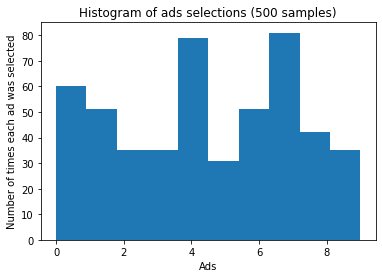

In [11]:
# Visualizing the results
# We would pick the machine with the highest Confidence Bound

plt.hist(ads_selected)
plt.title("Histogram of ads selections (500 samples)")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()